# **<center>Problema Arbitraje Financiero</center>**

**Teoría**

`Formulación (basada en aristas)`


Construimos un grafo dirigido en el que cada nodo corresponde a un activo, y cada arista dirigida se pondera con el tasa de conversión correspondiente. Un tipo de conversión $c_{ij}$ significa que si se tiene una unidad del bien i, se puede convertir en  $c_{ij}$ unidades del bien j sin coste adicional. En general, el tipo de conversión del bien i al bien j es diferente del tipo de conversión del bien j al bien i tipo de conversión del activo j al activo i (es decir,  $c_{ij} \neq c_{ji}$, en general). Se supone que los costes de transacción están incluidos en el por lo que existe un coste de transacción relativo (por unidad) y ningún coste de transacción fijo (por transacción). El problema de optimización problema de optimización que queremos resolver es encontrar el ciclo más rentable en este gráfico. Para encontrar la oportunidad de arbitraje más rentable, buscamos maximizar el producto de las tasas de conversión en un ciclo. Definamos una variable de decisión binaria $x_{ij}$ que sea igual a uno si la arista correspondiente está incluida en el ciclo elegido, y cero en caso contrario. La formulación basada en nodos se expresa matematicamente como la busqueda del maximo de la siguiente función acompañada de sus correspondientes restricciones:


$$max \sum_{(i,j) \in E} log(c_{ij})$$

Donde la función objetivo poesee varias restricciones:

- $\forall i \in V$ debe cumplirse: 

$$\sum_{j,(i,j) \in E} x_{ij} = \sum_{j,(j,i) \in E} x_{ji} $$

- $\forall i \in V$ debe cumplirse: 

$$\sum_{j,(i,j) \in E} x_{ij} \leq 1$$

**Librerias**

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

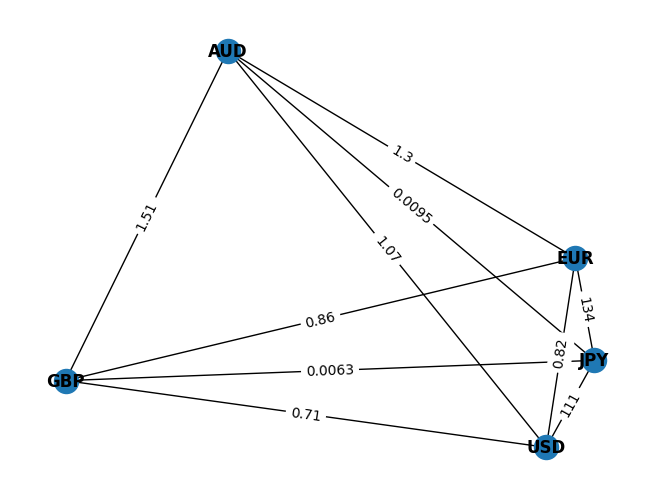

In [7]:
# Definir las monedas

monedas = ['USD', 'EUR', 'JPY', 'GBP', 'AUD']

# Definir las tasas de conversión

tasas_conversion = [[1, 0.82, 111, 0.71, 1.07],
                    [1.22, 1, 134, 0.86, 1.30],
                    [0.009, 0.007, 1, 0.0063, 0.0095],
                    [1.40, 1.15, 155, 1, 1.51],
                    [0.94, 0.78, 106, 0.66, 1]]

# Crear un grafo

G = nx.Graph()

# Agregar nodos

G.add_nodes_from(monedas)

# Agregar aristas

for i in range(len(monedas)):
    for j in range(i+1, len(monedas)):
        G.add_edge(monedas[i], monedas[j], weight=tasas_conversion[i][j])

# Dibujar el grafo

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
